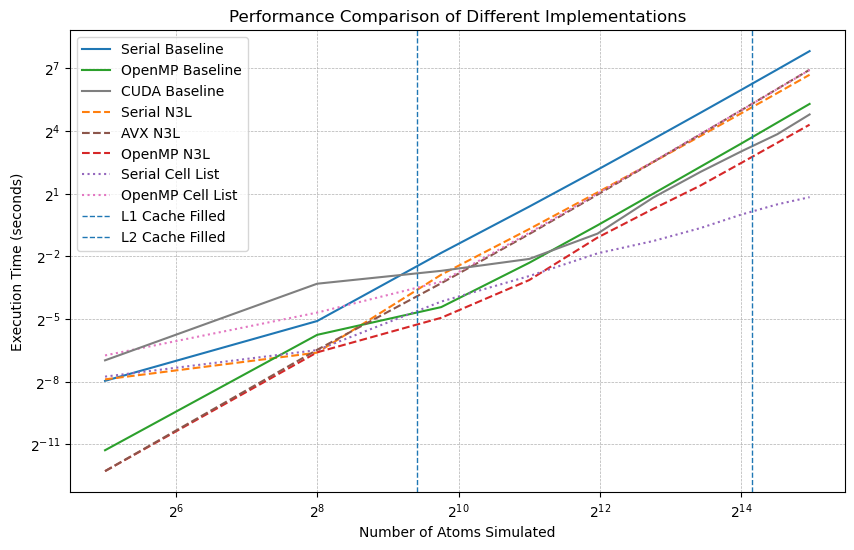

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data from the CSV file
data = pd.read_csv('data.csv')
data.replace(-1.0, np.nan, inplace=True)


# 1) define per-series linestyles (no leading spaces on keys!)
linestyle_map = {
    "Baseline":        "-",
    "OpenMP Baseline": "-",
    "CUDA Baseline":    "-",
    "N3L":             "--",
    "AVX N3L":            "--",      
    "OpenMP N3L":      "--",
    "Cell List":       ":",
    "OpenMP Cell List":   ":",       

}

plt.figure(figsize=(10, 6))
for column in data.columns[1:]:
    col = column.strip()                         # strip any stray whitespace
    style = linestyle_map.get(col, "-")          # look up the linestyle
    plt.plot(
        data["# Atoms"],
        data[column],
        label=col,                               # use the stripped name as label
        linestyle=style
    )

# 2) draw  vertical lines
plt.axvline(x=683, linestyle='--', linewidth=1, label='L1 Cache Filled')
plt.axvline(x=18204, linestyle='--', linewidth=1, label='L2 Cache Filled')

# axis labels, title
plt.xlabel('Number of Atoms Simulated')
plt.ylabel('Execution Time (seconds)')
plt.title('Performance Comparison of Different Implementations')
plt.minorticks_on()
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.xscale('log', base=2)
plt.yscale('log', base=2)


# 3) rebuild the legend one final time
ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()

# renames for the legend
label_map = {
    "Baseline":    "Serial Baseline",
    "N3L":         "Serial N3L",
    "Cell List":   "Serial Cell List"
}
labels = [ label_map.get(lbl, lbl) for lbl in labels ]

# final draw order
order = [
    "Serial Baseline", "OpenMP Baseline", "CUDA Baseline",
    "Serial N3L", "AVX N3L" ,"OpenMP N3L",
    "Serial Cell List", "OpenMP Cell List",
    "L1 Cache Filled", "L2 Cache Filled"
]
ordered = sorted(zip(handles, labels), key=lambda x: order.index(x[1]))
handles, labels = zip(*ordered)

plt.legend(handles, labels, loc='best')
plt.savefig('performance_comparison.png')

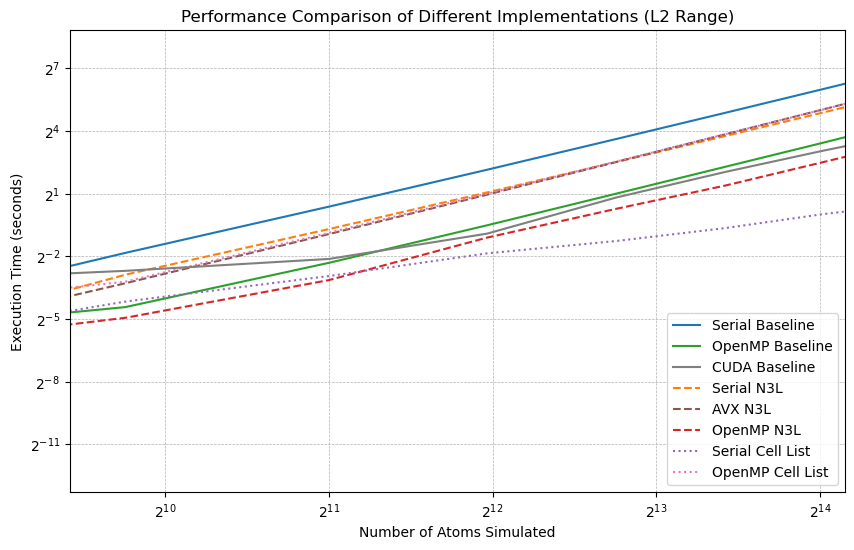

In [2]:
import pandas as pd

import matplotlib.pyplot as plt

# Load the data from the CSV file
data = pd.read_csv('data.csv')
data.replace(-1.0, np.nan, inplace=True)

# 1) define per-series linestyles (no leading spaces on keys!)
linestyle_map = {
    "Baseline":        "-",
    "OpenMP Baseline": "-",
    "CUDA Baseline":    "-",
    "N3L":             "--",
    "AVX N3L":            "--",      
    "OpenMP N3L":      "--",
    "Cell List":       ":",
    "OpenMP Cell List":   ":",       

}

plt.figure(figsize=(10, 6))
for column in data.columns[1:]:
    col = column.strip()                         # strip any stray whitespace
    style = linestyle_map.get(col, "-")          # look up the linestyle
    plt.plot(
        data["# Atoms"],
        data[column],
        label=col,                               # use the stripped name as label
        linestyle=style
    )


# axis labels, title
plt.xlabel('Number of Atoms Simulated')
plt.ylabel('Execution Time (seconds)')
plt.title('Performance Comparison of Different Implementations (L2 Range)')
plt.minorticks_on()
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.xscale('log', base=2)
plt.yscale('log', base=2)
plt.xlim(683, 18204)


# 3) rebuild the legend one final time
ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()

# renames for the legend
label_map = {
    "Baseline":    "Serial Baseline",
    "N3L":         "Serial N3L",
    "Cell List":   "Serial Cell List"
}
labels = [ label_map.get(lbl, lbl) for lbl in labels ]

# final draw order
order = [
    "Serial Baseline", "OpenMP Baseline", "CUDA Baseline",
    "Serial N3L", "AVX N3L" ,"OpenMP N3L",
    "Serial Cell List", "OpenMP Cell List",
    "L1 Cache Filled", "L2 Cache Filled"
]
ordered = sorted(zip(handles, labels), key=lambda x: order.index(x[1]))
handles, labels = zip(*ordered)

plt.legend(handles, labels, loc='lower right')
plt.savefig('performance_comparison_L2.png')

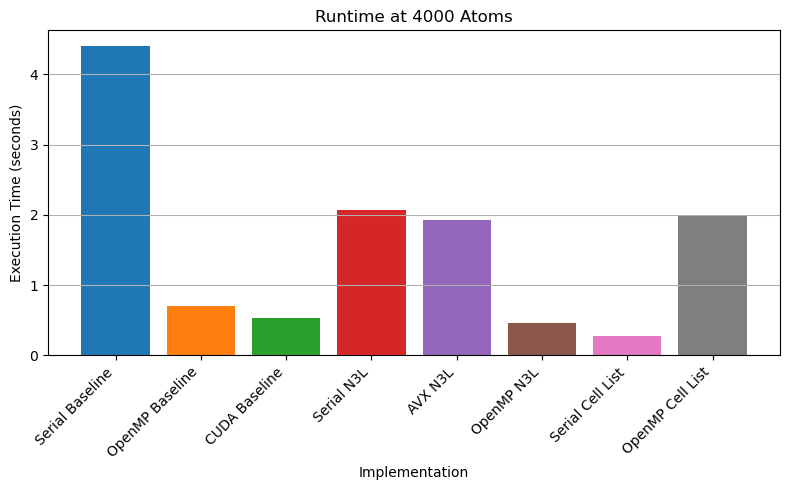

In [3]:
# 4) slice at a fixed #atoms and bar‑plot
slice_atoms = 4000
row = data[data["# Atoms"] == slice_atoms].iloc[0]

# 4a) raw labels & times
methods_raw = row.index.drop("# Atoms").str.strip()
labels_raw  = [ label_map.get(m, m) for m in methods_raw ]
times_raw   = row.drop("# Atoms").values.astype(float)

# 4b) define the same order as your first figure (no vertical‑line labels!)
order_shared = [
    "Serial Baseline", "OpenMP Baseline", "CUDA Baseline",
    "Serial N3L"    , "AVX N3L"        , "OpenMP N3L",
    "Serial Cell List", "OpenMP Cell List"
]

# 4c) sort into that order
ordered = sorted(zip(labels_raw, times_raw),
                 key=lambda x: order_shared.index(x[0]))
labels_sorted, times_sorted = zip(*ordered)

import matplotlib as mpl
# grab the default color cycle
cycle = mpl.rcParams['axes.prop_cycle'].by_key()['color']

# order_shared must match the first figure’s legend order
order_shared = [
    "Serial Baseline", "OpenMP Baseline", "CUDA Baseline",
    "Serial N3L",     "AVX N3L",       "OpenMP N3L",
    "Serial Cell List","OpenMP Cell List"
]

# pick a color for each bar from the cycle
bar_colors = [ cycle[ order_shared.index(lbl) ] for lbl in labels_sorted ]

# now plot
plt.figure(figsize=(8,5))
plt.bar(labels_sorted, times_sorted, color=bar_colors)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Implementation")
plt.ylabel("Execution Time (seconds)")
plt.title(f"Runtime at {slice_atoms} Atoms")
plt.tight_layout()
plt.grid(axis='y')
plt.savefig(f"performance_slice_{slice_atoms}.png")
plt.show()

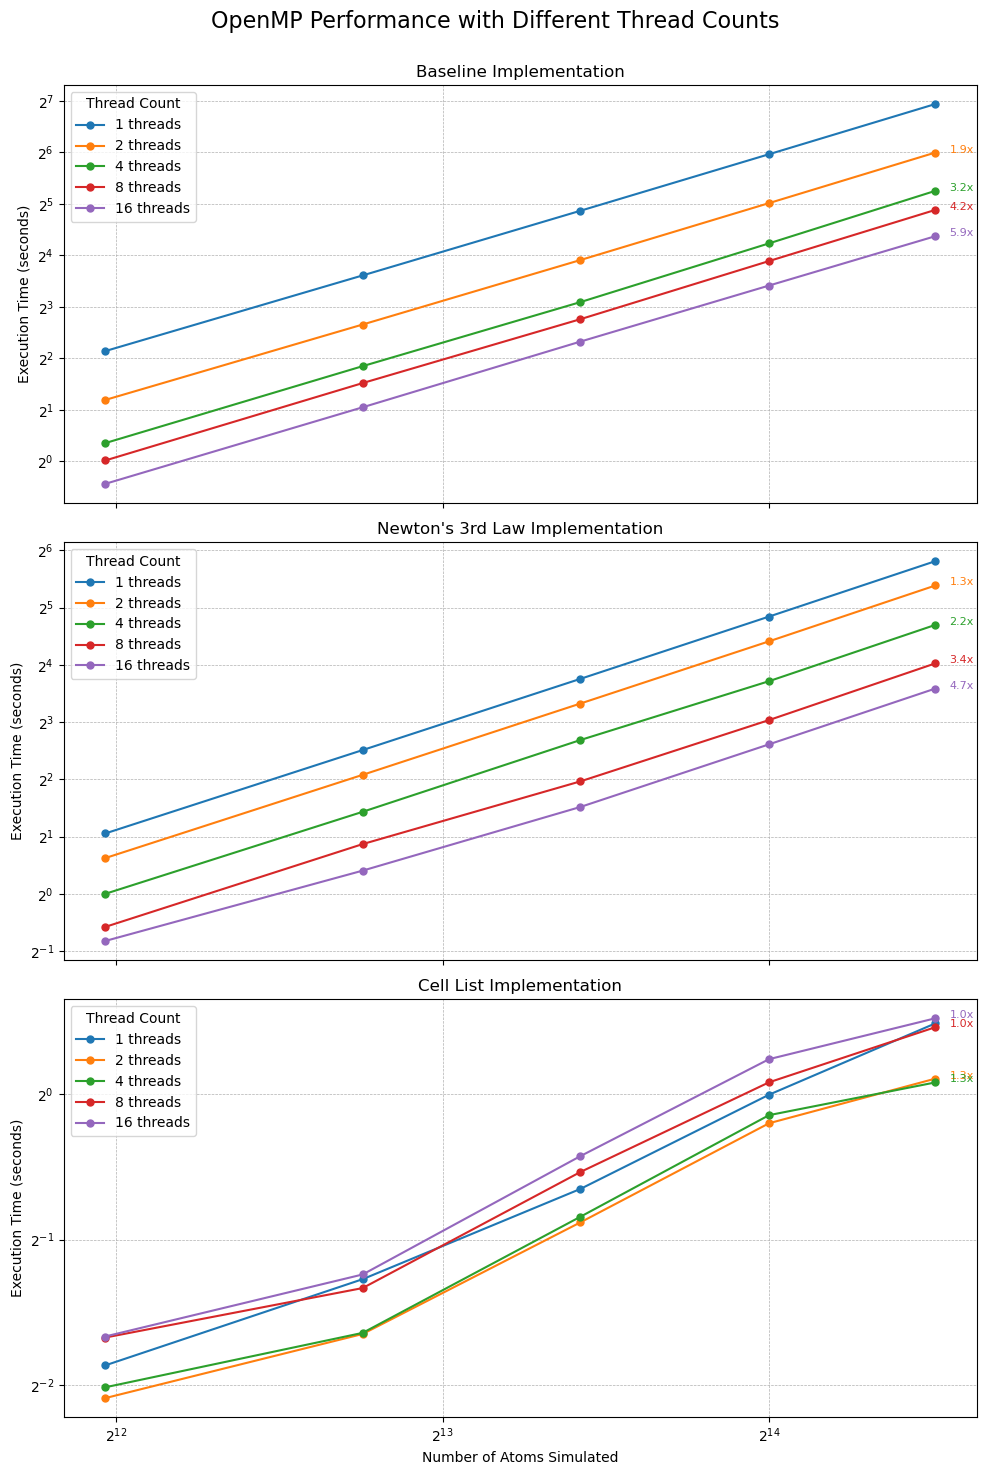

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the OpenMP data from the CSV file
data = pd.read_csv('openmp_data.csv')
data.columns = data.columns.str.strip()  # Strip whitespace from column names

# Define colors for different thread counts
thread_colors = {
    '1': '#1f77b4',  # blue
    '2': '#ff7f0e',  # orange
    '4': '#2ca02c',  # green
    '8': '#d62728',  # red
    '16': '#9467bd'  # purple
}

# Create figure with 3 subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 15), sharex=True)

# Group columns by implementation type
implementations = ['Base', 'N3L', 'Cells']
implementation_names = {'Base': 'Baseline', 'N3L': 'Newton\'s 3rd Law', 'Cells': 'Cell List'}

# Plot each implementation type in its own subplot
for i, impl in enumerate(implementations):
    ax = axs[i]
    
    # Get columns for this implementation type
    cols = [col for col in data.columns if col.startswith(impl)]
    
    # Plot each thread count as a separate line
    for col in cols:
        _, thread_count = col.split('-')
        ax.plot(
            data['# Atoms'], 
            data[col], 
            label=f'{thread_count} threads',
            color=thread_colors[thread_count],
            marker='o',
            markersize=5
        )
    
    # Configure the subplot
    ax.set_title(f'{implementation_names[impl]} Implementation')
    ax.set_ylabel('Execution Time (seconds)')
    ax.grid(which='both', linestyle='--', linewidth=0.5)
    ax.set_xscale('log', base=2)
    ax.set_yscale('log', base=2)
    ax.legend(title='Thread Count')
    
    # Add speedup annotations next to the last data point
    max_atoms = data['# Atoms'].max()
    single_thread_val = data[f"{impl}-1"].iloc[-1]
    
    for col in cols:
        if col == f"{impl}-1":
            continue
            
        _, thread_count = col.split('-')
        multi_thread_val = data[col].iloc[-1]
        speedup = single_thread_val / multi_thread_val
        
        ax.annotate(
            f"{speedup:.1f}x",
            xy=(max_atoms, multi_thread_val),
            xytext=(10, 0),
            textcoords="offset points",
            fontsize=8,
            color=thread_colors[thread_count]
        )

# Set common x-axis label
axs[2].set_xlabel('Number of Atoms Simulated')

# Add overall title
fig.suptitle('OpenMP Performance with Different Thread Counts', fontsize=16)

# Tight layout with space for the title
plt.tight_layout()
plt.subplots_adjust(top=0.93)

# Save the figure
plt.savefig('openmp_implementation_comparison.png')
plt.show()